In [268]:
# Import Packages Needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from io import StringIO
from sklearn.preprocessing import MinMaxScaler

In [355]:
# Load Heart Attack Data
file_path = 'heart.csv'
df = pd.read_csv(file_path)

In [281]:
# Age: Age
# Sex: Sex
# cp: Chest pain (0-3)
# trtbps: resting blood preassure
# chol: cholesteral in mg/dl
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg: resting electrocardiographic results (0-2)
# thalachh: maximum heart rate achieved
# exng: exercise induced angina (1 = yes; 0 = no)
# oldpeak: Previous peak
# slp: Slope
# caa: Number of major vessels (0-3)
# thall: Thal rate (1-3)
# output: Target variable


In [356]:
print('The shape of the dataset is : ', df.shape)

The shape of the dataset is :  (303, 14)


In [357]:
# Preview the first datapoint
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [359]:
# All ints except oldpeak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [360]:
# Summary of the data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [361]:
# Eliminate Missing Values
missing_values = df.isnull()
print(missing_values)

       age    sex     cp  trtbps   chol    fbs  restecg  thalachh   exng   
0    False  False  False   False  False  False    False     False  False  \
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     oldpeak    slp    caa  thall  output  
0      False  False  False  False   False  

In [362]:
# Fill empty cells
df.fillna(df.mean(), inplace=True)

In [363]:
# View duplicate data
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [364]:
# Drop them
df.drop_duplicates(inplace=True)

In [365]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [366]:
# Drop unwanted Data
df = df.drop(columns=['fbs', 'restecg'])

In [367]:
# Convert to Lowercase
df.columns.str.lower().rename(' ', '_')

In [368]:
print('Number of rows are :',df.shape[0], ', and number of columns are :',df.shape[1])

Number of rows are : 302 , and number of columns are : 12


In [369]:
# Save Clean Data
df.to_csv('cleandata.csv', index=False)

Patient data that displays the sex of the people recorded


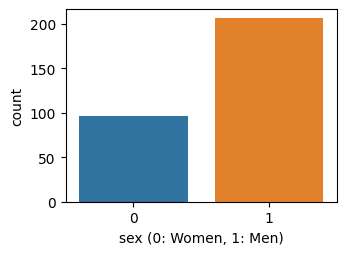

In [370]:
# Sex chart
plt.figure(figsize=(3.5,2.5))
sns.countplot(data=df, x = 'sex')
print('Patient data that displays the sex of the people recorded')
plt.xlabel('sex (0: Women, 1: Men)')
plt.show()

Patient data of those likely to have heart attack


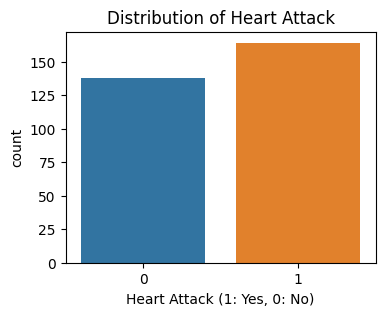

In [371]:
# Age count
plt.figure(figsize=(4,3))
sns.countplot(x='output', data=df)
print('Patient data of those likely to have heart attack')
plt.title('Distribution of Heart Attack')
plt.xlabel('Heart Attack (1: Yes, 0: No)')
plt.show()

Chest pain within patients:
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic


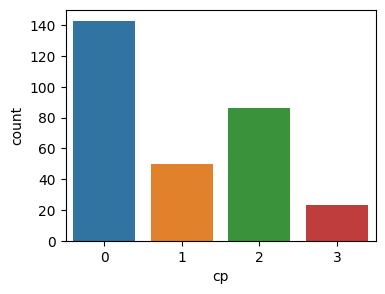

In [372]:
# Chest pain levels
plt.figure(figsize=(4,3))
sns.countplot(x='cp', data=df)
print('Chest pain within patients:\nValue 0: typical angina\nValue 1: atypical angina\nValue 2: non-anginal pain\nValue 3: asymptomatic')

In [373]:
# Correlation of data
df.corr()

,age,sex,cp,trtbps,chol,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146
slp,-0.164124,-0.032990,0.116854,-0.122873,0.000417,0.384754,-0.256106,-0.576314,1.000000,-0.092236,-0.103314,0.343940
caa,0.302261,0.113060,-0.195356,0.099248,0.086878,-0.228311,0.125377,0.236560,-0.092236,1.000000,0.160085,-0.408992


In [374]:
# Creation of matrix
correlation_matrix = df.corr()

Correlation of the data:
Closer to 1 = higher correlation 
Further from 1 = lower correlation


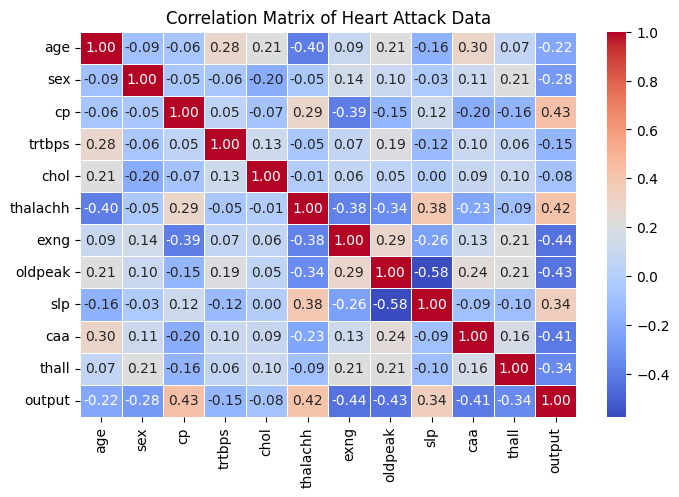

In [375]:
# Heatmap better displaying correlation of data
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Heart Attack Data')
print('Correlation of the data:\nCloser to 1 = higher correlation \nFurther from 1 = lower correlation')
plt.show()

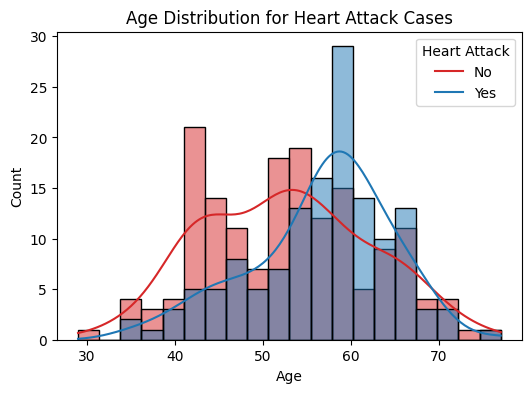

In [376]:
# Histplot displaying Ages of Heart Attack Cases
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='output', bins=20, kde=True, palette= custom_palette)
plt.title('Age Distribution for Heart Attack Cases')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()

In [377]:
# custom color
custom_palette = ['#1f77b4', '#d62728']

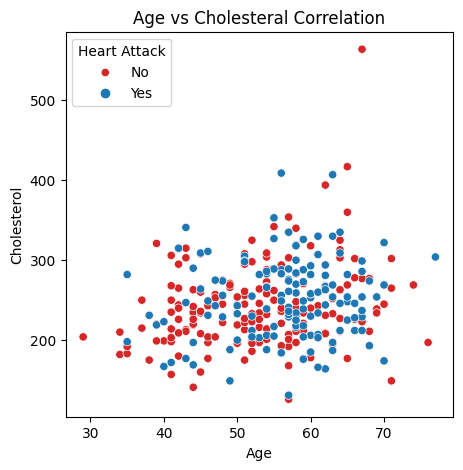

In [378]:
# scatterplot age vs cholesteral
plt.figure(figsize=[5,5])
sns.scatterplot(data=df, x='age', y='chol', hue='output', palette=custom_palette)
plt.title('Age vs Cholesteral Correlation')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Attack', labels=['No','Yes'])
plt.show()

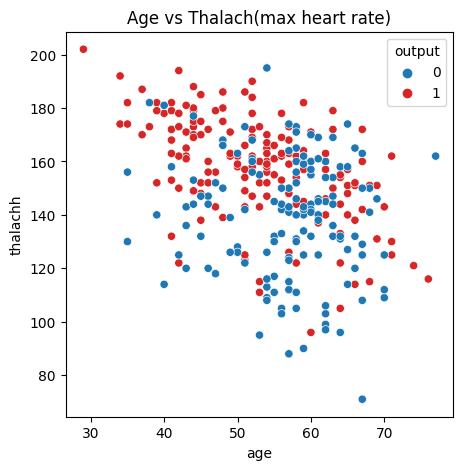

In [379]:
# scatterplot age vs max heart rate
plt.figure(figsize=(5,5))
sns.scatterplot(x='age', y='thalachh', hue='output', data=df, palette=custom_palette)
plt.title('Age vs Thalach(max heart rate)')
plt.show()

In [380]:
# numeric columns
numerical_columns = ['trtbps', 'exng', 'thall', 'oldpeak', 'slp', 'caa']

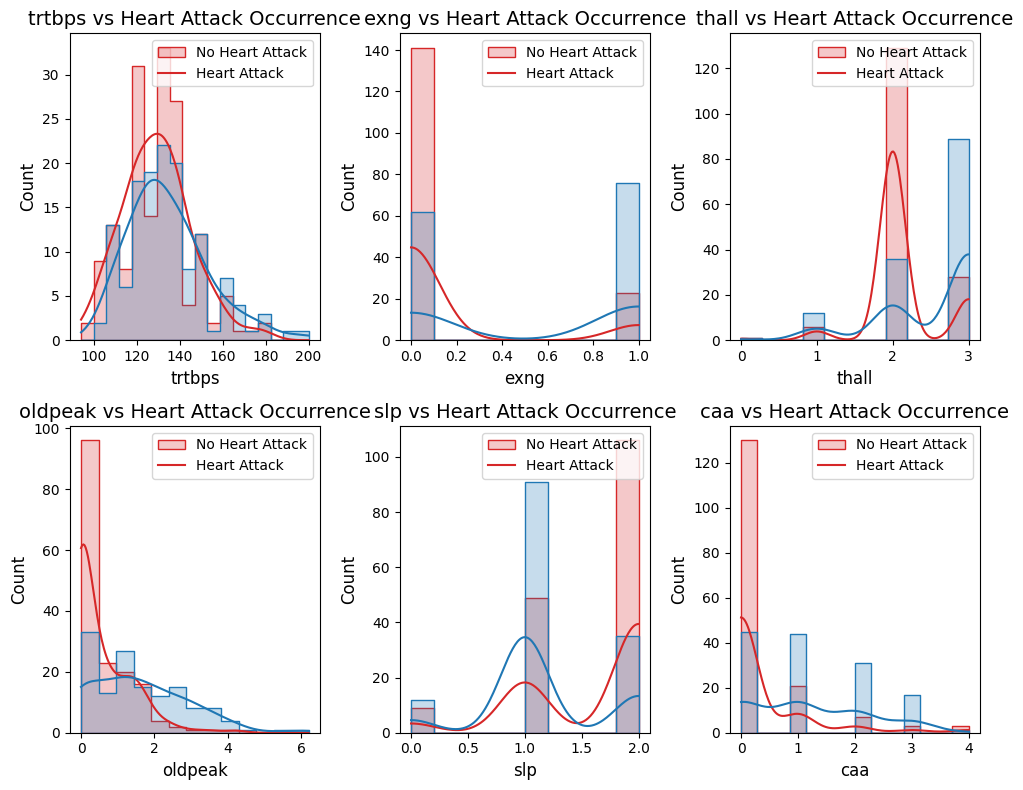

In [381]:
# six charts displaying trtbps, exng, thall, oldpeak, slp, caa, vs heart attack occurence
plt.figure(figsize=(10,8))
for column in numerical_columns:
    plt.subplot(2, 3, numerical_columns.index(column) + 1)
    sns.histplot(data=df, x=column, hue='output', element='step', kde=True, palette= custom_palette)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'{column} vs Heart Attack Occurrence', fontsize=14)
    plt.legend(['No Heart Attack', 'Heart Attack'])

plt.tight_layout()
plt.show()

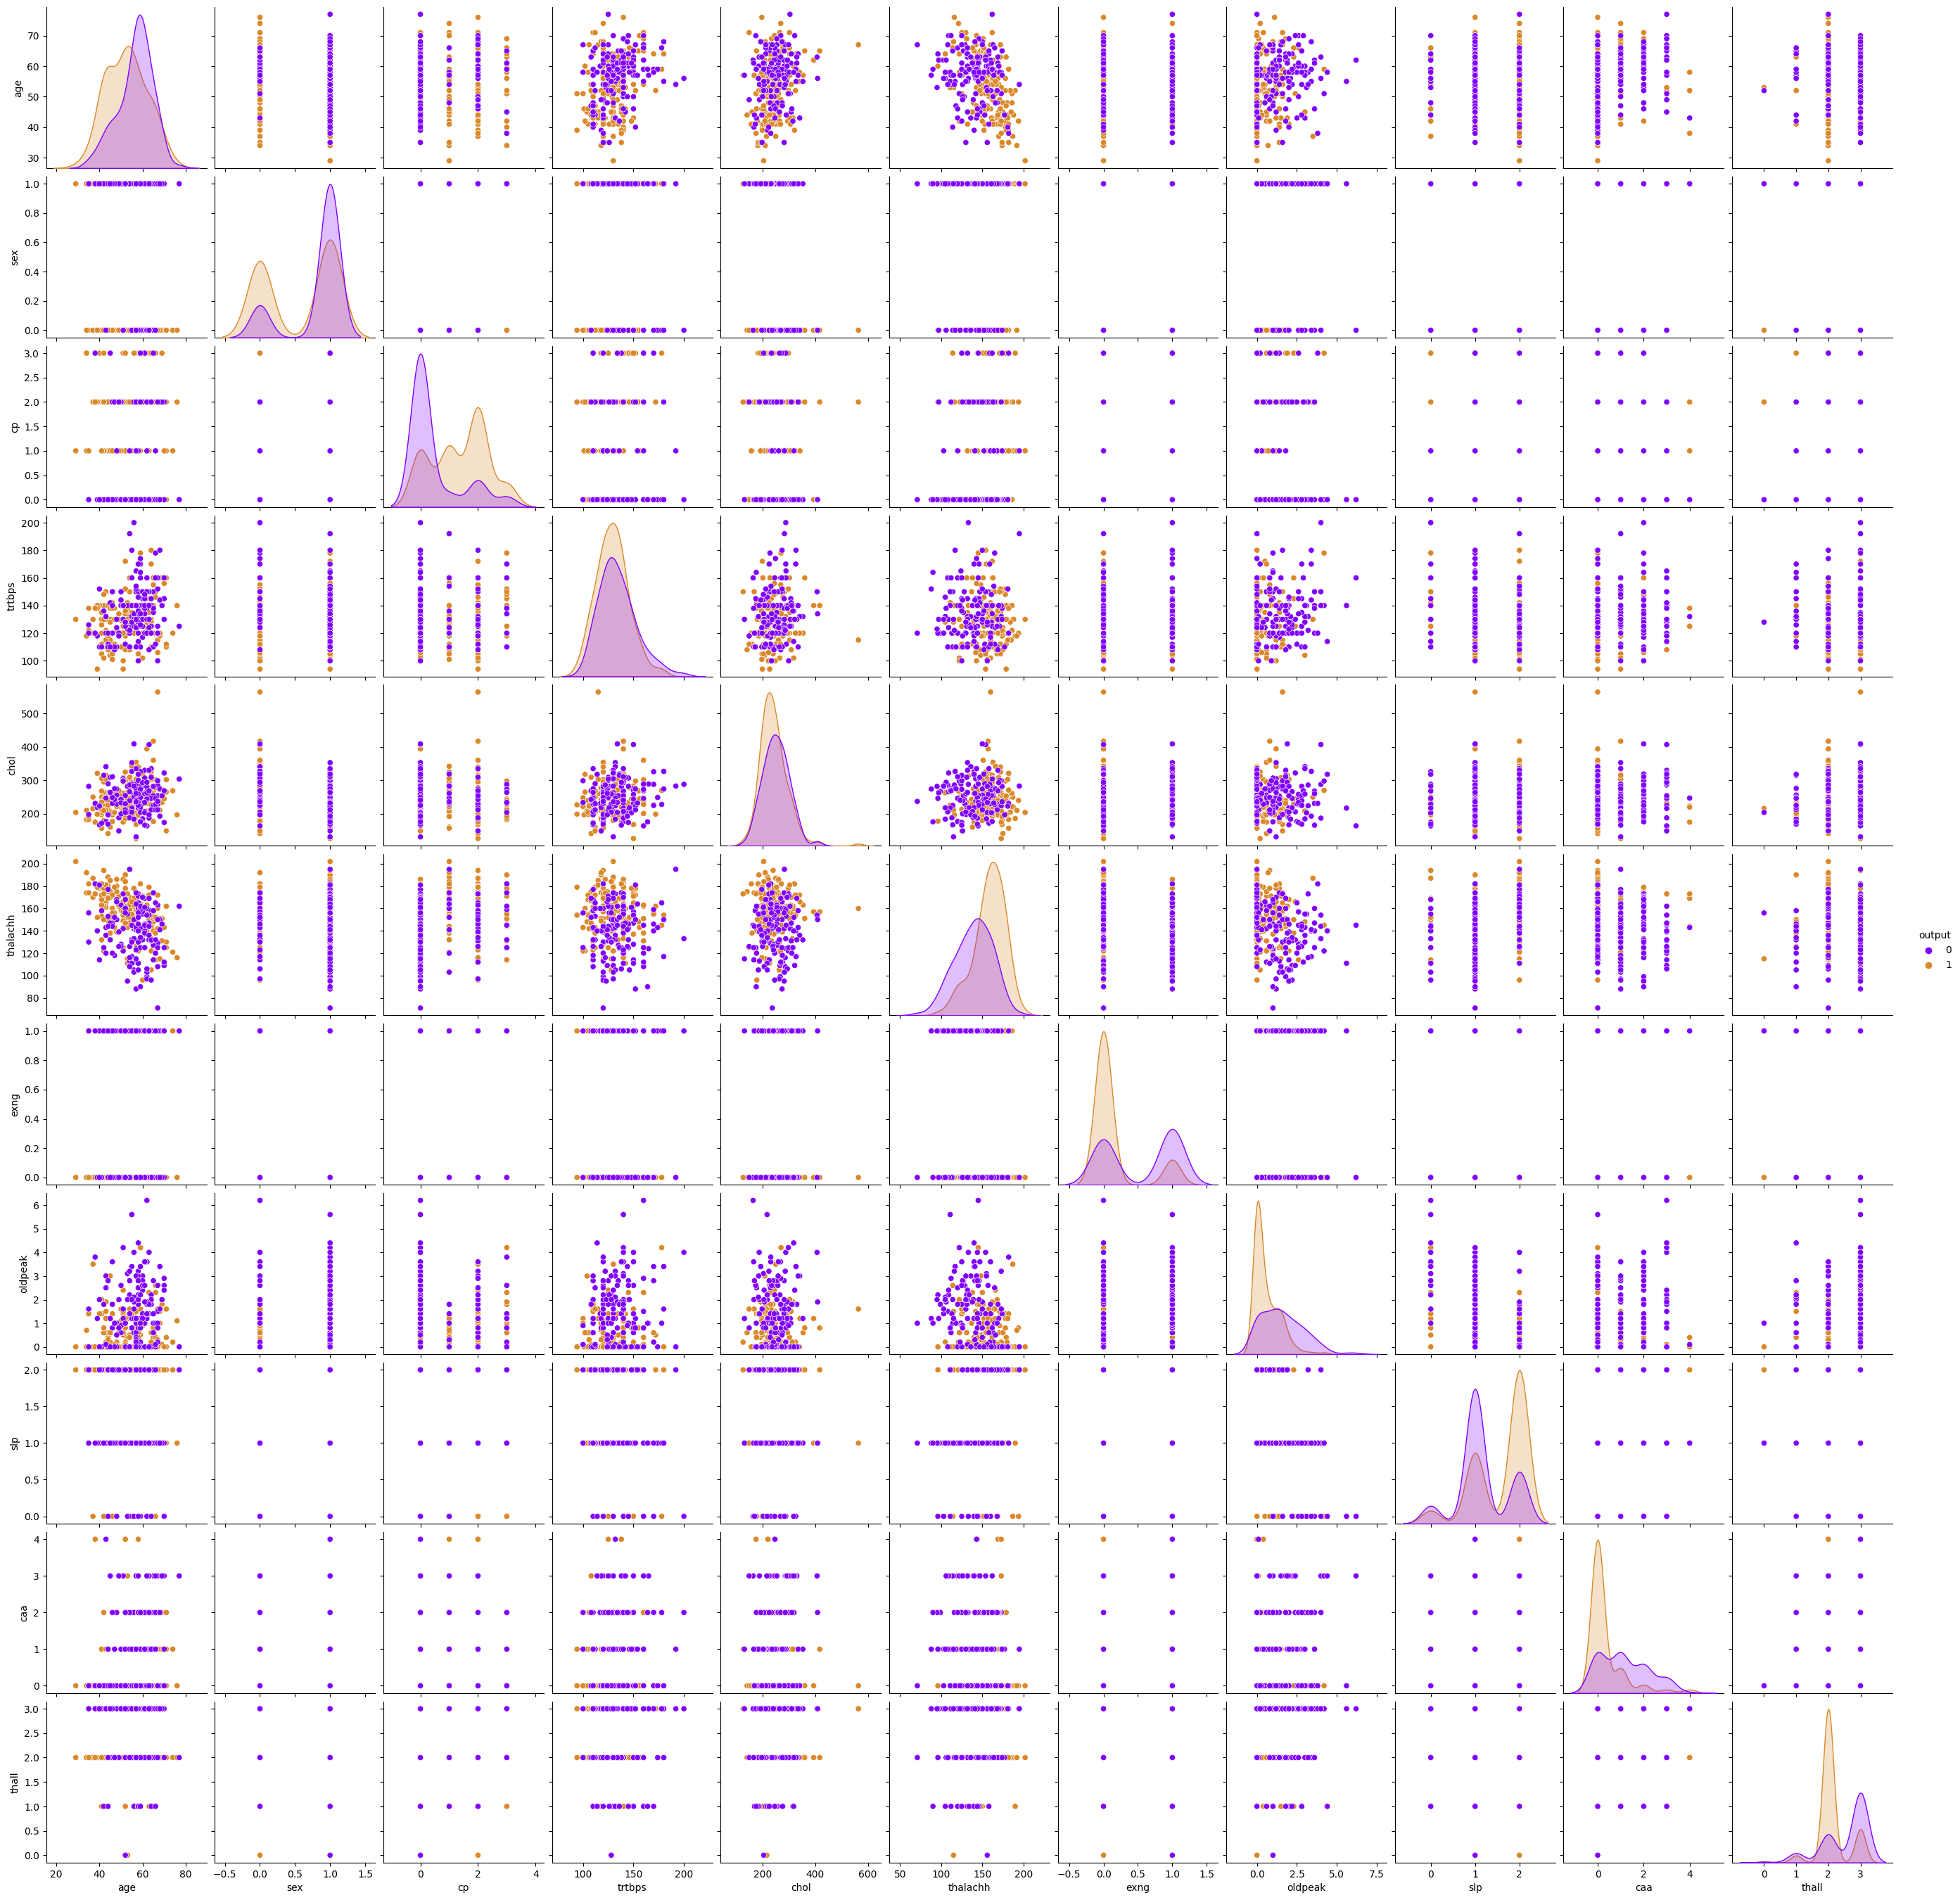

In [382]:
# pairplot for more correlation
sns.pairplot(df,hue='output', diag_kind='kde', palette = ["#8000ff","#da8829"])  
plt.show()

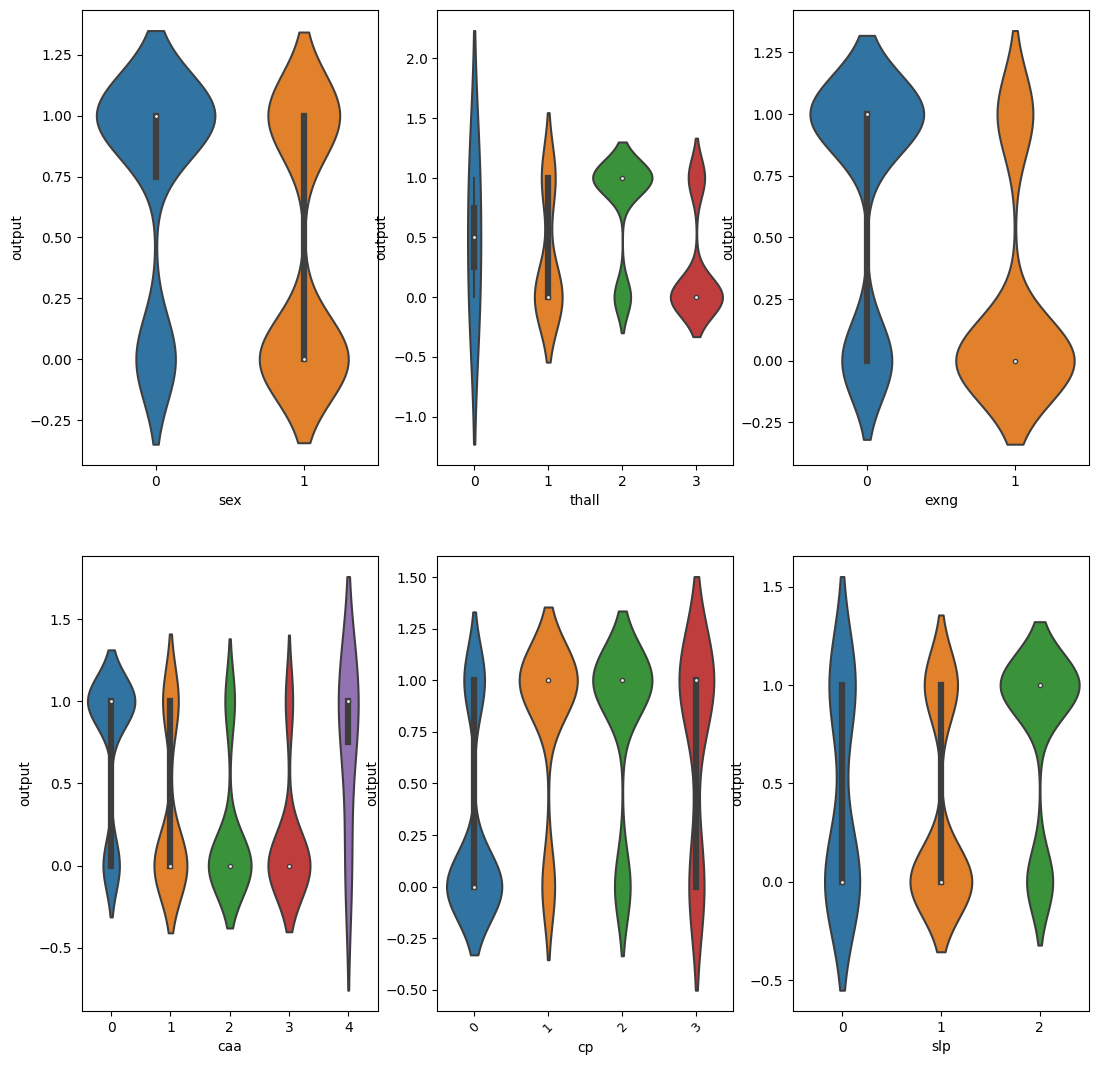

In [383]:
# violin plot
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data=df)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data=df)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data=df)
plt.subplot(2,3,4)
sns.violinplot(x = 'caa', y = 'output', data=df)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data=df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'slp', y = 'output', data=df)
plt.show()

In [384]:
# modules needed for ML models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [385]:
# separated x and y. 'output' is the y, the rest are x
x = df.drop('output', axis=1)
y = df['output']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=100)

In [386]:
# display of the training and testing sets for x
x_train,x_test

(     age  sex  cp  trtbps  chol  thalachh  exng  oldpeak  slp  caa  thall
 41    48    1   1     130   245       180     0      0.2    1    0      2
 165   67    1   0     160   286       108     1      1.5    1    3      2
 111   57    1   2     150   126       173     0      0.2    2    1      3
 59    57    0   0     128   303       159     0      0.0    2    1      2
 167   62    0   0     140   268       160     0      3.6    0    2      2
 ..   ...  ...  ..     ...   ...       ...   ...      ...  ...  ...    ...
 66    51    1   2     100   222       143     1      1.2    1    0      2
 53    44    0   2     108   141       175     0      0.6    1    0      2
 79    58    1   2     105   240       154     1      0.6    1    0      3
 281   52    1   0     128   204       156     1      1.0    1    0      0
 8     52    1   2     172   199       162     0      0.5    2    0      3
 
 [241 rows x 11 columns],
      age  sex  cp  trtbps  chol  thalachh  exng  oldpeak  slp  caa  tha

In [387]:
# display of the training and testing sets for y
y_train, y_test

(41     1
 165    0
 111    1
 59     1
 167    0
       ..
 66     1
 53     1
 79     1
 281    0
 8      1
 Name: output, Length: 241, dtype: int64,
 198    0
 206    0
 112    1
 268    0
 46     1
       ..
 210    0
 243    0
 204    0
 19     1
 175    0
 Name: output, Length: 61, dtype: int64)

In [388]:
# creation of the logistic regression model
ml_model_logistic = LogisticRegression(random_state=100, max_iter=1000)

In [389]:
# training the model
ml_model_logistic.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [390]:
#
y_pred_logistic = ml_model.predict(x_test)

In [391]:
# displaying accuracy of logistic regression ML model
accuracyLR = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy of Logistic Regression: {accuracyLR:.2f}%")

Accuracy of Logistic Regression: 0.84%


In [392]:
# more info on the results
class_report_logistic = classification_report(y_test, y_pred_logistic)
print(f'                         Classification Report:  \n \n {class_report}')

                         Classification Report:  
 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.73      0.85      0.79        26

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [394]:
# matrix displaying TP, TN, FP, FN
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(f"Confusion Matrix: \n {conf_matrix_logistic} ")

Confusion Matrix: 
 [[27  8]
 [ 2 24]] 


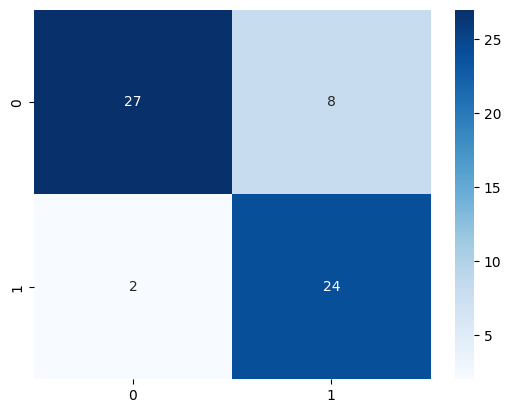

In [395]:
# better display
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.show()

In [396]:
# module needed for svm model
from sklearn.svm import SVC

In [397]:
# creation of svm ML model
svm_classifier = SVC(kernel='linear', C=1.0, random_state=100)
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)

In [398]:
# displaying accuracy
accuracySVM = accuracy_score(y_test, y_pred_svm)
print(f'SVM ML model accuracy: {accuracySVM:.2f}%')

SVM ML model accuracy: 0.80%


In [399]:
# further info
print('                      Classification Report:\n')
print(classification_report(y_test, y_pred_svm))

                      Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.73      0.85      0.79        26

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [400]:
# creation of matrix of TP, FP, FN, TN
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('SVM Confusion Matrix:')
print(svm_conf_matrix)

SVM Confusion Matrix:
[[27  8]
 [ 4 22]]


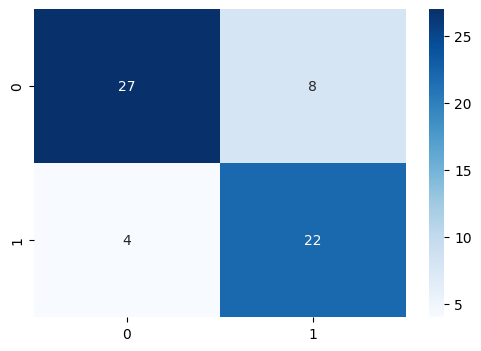

In [401]:
plt.figure(figsize=(6,4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [402]:
# Display of both models accuracy, logistic regression model is 4% more accurate
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Logistic Regression Accuracy: {accuracyLR:.2f}%')
print(f'SVM Precision: {accuracySVM:.2f}%')

Logistic Regression Accuracy: 0.84%
SVM Precision: 0.80%
